# Part I: Advanced Network Structure

We start by looking at the structure of the the philosopher network using the more complicated network measures. If your network has more than one component, just work on the giant connected component (GCC) in the exercises below (in a directed graph use the weakly connected component).

Not all of the measures we'll be considering below are defined for directed graphs, thus begin by creating an undirected version of the philosopher graph, that we can use whenever needed. Only use the undirected graph when explicitly stated in the exercise.

In [552]:
# First we'll get the seven lists into this notebook, we'll skip names involving unicode since they create a lot of problems:
import re
import io
import urllib2
import json
epistemologistsResponse = urllib2.urlopen("https://en.wikipedia.org/w/api.php?action=query&titles=List_of_epistemologists&prop=revisions&rvprop=content&format=json")
htmlEpi = epistemologistsResponse.read()
varEpi = json.loads(htmlEpi)
epistemologists = varEpi['query']['pages'][varEpi['query']['pages'].keys()[0]]['revisions'][0]['*']
regEpistemologists = re.findall(r'[(^\[\[)|][\w\s\-\'\(\),.?]+\]\]', epistemologists)
epistemologistsList = [item[1:-2] for item in regEpistemologists if item[1] == item[1].upper()][:-2]

In [554]:
ethicistResponse = urllib2.urlopen("https://en.wikipedia.org/w/api.php?action=query&titles=List_of_ethicists&prop=revisions&rvprop=content&format=json")
htmlEth = ethicistResponse.read()
varEth = json.loads(htmlEth)
ethicists = varEth['query']['pages'][varEth['query']['pages'].keys()[0]]['revisions'][0]['*']
#we take everything between double opening square brackets and either a closing of them or a |
regEthicists = re.findall(r'[(^\[\[)|][\w\s\-\'\(\),.?]+\]\]', ethicists)
ethicistsList = [item[1:-2] for item in regEthicists if item[1] == item[1].upper()][:-2]
ethicistsList.remove('Dalai Lama')
ethicistsList.remove('UN Declaration of Universal Human Rights')
ethicistsList.remove('Ethical Decalogue')

In [555]:
aestheticianResponse = urllib2.urlopen("https://en.wikipedia.org/w/api.php?action=query&titles=List_of_aestheticians&prop=revisions&rvprop=content&format=json")
htmlAest = aestheticianResponse.read()
varAest = json.loads(htmlAest)
aestheticians = varAest['query']['pages'][varAest['query']['pages'].keys()[0]]['revisions'][0]['*']
regAestheticians = re.findall(r'[(^\[\[)|][\w\s\-\'\(\),.?]+\]\]', aestheticians)
aestheticiansList = [item[1:-2] for item in regAestheticians if item[1] == item[1].upper()][:-2]
aestheticiansList.remove('Poetics')
aestheticiansList.remove('Rhetoric')
aestheticiansList.remove('Of the Standard of Taste')
aestheticiansList.remove('A Portrait of the Artist as a Young Man')
aestheticiansList.remove('Critique of Judgment')
aestheticiansList.remove('The Literary Mind and the Carving of Dragons')
aestheticiansList.remove('Symposium')
aestheticiansList.remove('Schopenhauer\'s aesthetics')

In [556]:
logicianResponse = urllib2.urlopen("https://en.wikipedia.org/w/api.php?action=query&titles=List_of_logicians&prop=revisions&rvprop=content&format=json")
htmlLog = logicianResponse.read()
varLog = json.loads(htmlLog)
logicians = varLog['query']['pages'][varLog['query']['pages'].keys()[0]]['revisions'][0]['*']
regLogicians = re.findall(r'[(^\[\[)|][\w\s\-\'\(\),.?]+\]\]', logicians)
logiciansList = [item[1:-2] for item in regLogicians if item[1] == item[1].upper()][1:-2]
logiciansList.remove('Pope John XXI')

In [557]:
# List of metaphysicians
metaphysicianResponse = urllib2.urlopen("https://en.wikipedia.org/w/api.php?action=query&titles=List_of_metaphysicians&prop=revisions&rvprop=content&format=json")
htmlMet = metaphysicianResponse.read()
varMet = json.loads(htmlMet)
metaphysicians = varMet['query']['pages'][varMet['query']['pages'].keys()[0]]['revisions'][0]['*']
regMetaphysicians = re.findall(r'[(^\[\[)|][\w\s\-\'\(\),.?]+\]\]', metaphysicians)
metaphysiciansList = [item[1:-2] for item in regMetaphysicians if item[1] == item[1].upper()][1:-2]

In [558]:
# List of social and political philosophers
socialResponse = urllib2.urlopen("https://en.wikipedia.org/w/api.php?action=query&titles=List_of_social_and_political_philosophers&prop=revisions&rvprop=content&format=json")
htmlSoc = socialResponse.read()
varSoc = json.loads(htmlSoc)
socials = varSoc['query']['pages'][varSoc['query']['pages'].keys()[0]]['revisions'][0]['*']
regSocials = re.findall(r'[(^\[\[)|][\w\s\-\'\(\),.?]+\]\]', socials)
socialsList = [item[1:-2] for item in regSocials if item[0] == item[0].upper()][1:-6]

In [559]:
allPhilosophers = socialsList + metaphysiciansList + logiciansList + aestheticiansList + ethicistsList + epistemologistsList
allPhilosophers = sorted(allPhilosophers)

for i in range(len(allPhilosophers)):
    allPhilosophers[i] = str(allPhilosophers[i]).replace(" ","_")  

In [564]:
# We copy the material from the json-formatted wikipedia sites for each philosopher into our files:
from os import path

baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query&titles="
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

for i in range(len(allPhilosophers)):
    allPhilosophers[i] = str(allPhilosophers[i]).replace(" ","_")
    title = allPhilosophers[i]
    file_path = path.relpath("PhilosophersFiles/" + title + ".txt")
    philFile = open(file_path, "w")
    query = "%s%s%s&%s&%s" % (baseurl, action, title, content, dataformat)
    philResponse = urllib2.urlopen(query)
    wikisource = philResponse.read()
    wikijson = json.loads(wikisource)
    philFile.write(str(wikijson))
    philFile.close()

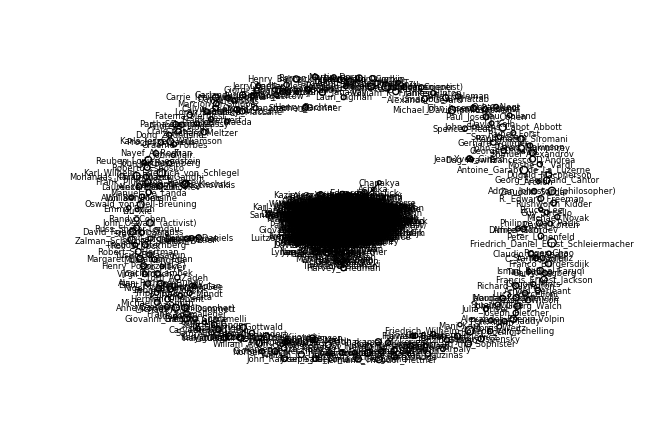

In [565]:
# We get an undirected graph from all of the philosophers nodes
# For some reason, the edges aren't showing, but they're there
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

philosophersUndirected = nx.Graph()
for i in range(len(allPhilosophers)):
    nodes = philosophersUndirected.nodes()
    title = str(allPhilosophers[i].replace(" ","_"))
    file_path = path.relpath("PhilosophersFiles/" + title + ".txt")
    philosopherFile = open(file_path, "r")
    regPhilosophers  = re.findall(r'[(^\[\[)|][\w\s\-\'\(\),.?]+\]\]', philosopherFile.read())
    philosopherFileStringList = [item[1:-2] for item in regPhilosophers if item[1] == item[1].upper()]
    philosopher_file_string_list = [item.replace(" ","_") for item in philosopherFileStringList]
    philNodes = set(philosopher_file_string_list).intersection(allPhilosophers)
    philNodesList = [philosophersUndirected.add_node(philNode, label=philNode) for philNode in philNodes]
    nodeAlready = list(set(nodes).intersection(title))
    if len(nodeAlready) is 0:
        philosophersUndirected.add_node(title)
        philNodesEdges = [philosophersUndirected.add_edges_from([(title,philNode)]) for philNode in philNodes]
    if len(nodeAlready) is not 0:
        philNodesEdges = [philosophersUndirected.add_edges_from([(nodeAlready[0],philNode)]) for philNode in philNodes]    
nx.draw(philosophersUndirected, with_labels = True, font_size=6, node_size=[len(v) for v in philosophersUndirected.nodes()], node_color='none')

plt.show()

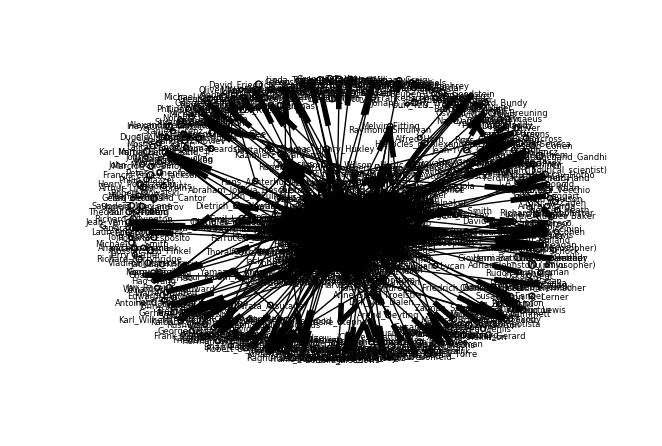

In [567]:
# Then we'll do another graph, this time directed:
philosophersDirected = nx.DiGraph()
for i in range(len(allPhilosophers)):
    nodes = philosophersDirected.nodes()
    title = str(allPhilosophers[i].replace(" ","_"))
    file_path = path.relpath("PhilosophersFiles/" + title + ".txt")
    philosopherFile = open(file_path, "r")
    regPhilosophers  = re.findall(r'[(^\[\[)|][\w\s\-\'\(\),.?]+\]\]', philosopherFile.read())
    philosopherFileStringList = [item[1:-2] for item in regPhilosophers if item[1] == item[1].upper()]
    philosopher_file_string_list = [item.replace(" ","_") for item in philosopherFileStringList]
    philNodes = set(philosopher_file_string_list).intersection(allPhilosophers)
    philNodesList = [philosophersDirected.add_node(philNode, label=philNode) for philNode in philNodes]
    nodeAlready = list(set(nodes).intersection(title))
    if len(nodeAlready) is 0:
        philosophersDirected.add_node(title)
        philNodesEdges = [philosophersDirected.add_edges_from([(title,philNode)]) for philNode in philNodes]
    if len(nodeAlready) is not 0:
        philNodesEdges = [philosophersDirected.add_edges_from([(nodeAlready[0],philNode)]) for philNode in philNodes]    
nx.draw(philosophersDirected, with_labels = True, font_size=6, node_size=[len(v) for v in philosophersDirected.nodes()], node_color='none')

plt.show()

* Find the 5 most central philosophers according to betweenness centrality. What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?

In [569]:
import operator
# We use the directed graph to calculate betweenness centrality for each philosopher:
betweenness = nx.betweenness_centrality(philosophersDirected)
top5betweennessKeys = sorted(betweenness.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print "These are the five most central philosophers according to betweenness centrality:"
print top5betweennessKeys

These are the five most central philosophers according to betweenness centrality:
[('Bertrand_Russell', 0.05903247610663117), ('Plato', 0.04127581945422952), ('Aristotle', 0.04067595465158795), ('David_Hume', 0.030224195654119504), ('Immanuel_Kant', 0.027536376779764175)]


A betweenness centrality is proportional to the number of shortest paths between all node pairs that run along the link. Therefore, philosophers with high wikipedia graph betweenness centrality are very center in the graph, they have a short path to every other philosopher mentioned, so they are very important in the history of philosophy, that is, many other philosophers have learned from them.

* Find the 5 most central philosophers according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). How is eigenvector centrality difference from degree centrality? Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?

In [570]:
# For directed graphs this is “left” eigevector centrality which corresponds to the in-edges in the graph. 
# For out-edges eigenvector centrality first reverse the graph with G.reverse().
eigenvectorIn = nx.eigenvector_centrality(philosophersDirected)
top5mostEigenvectorInCentralPhilosophers = sorted(eigenvectorIn.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print "These are the five most central philosophers according to eigenvector centrality for in-edges:"
print top5mostEigenvectorInCentralPhilosophers
print "\n"

# now we reverse our graph
philosophersDirRev = philosophersDirected.reverse()
eigenvectorOut = nx.eigenvector_centrality(philosophersDirRev)
top5mostEigenvectorOutCentralPhilosophers = sorted(eigenvectorOut.items(), key=operator.itemgetter(1), reverse = True)[0:5]
print "These are the five most central philosophers according to eigenvector centrality for out-edges:"
print top5mostEigenvectorOutCentralPhilosophers

These are the five most central philosophers according to eigenvector centrality for in-edges:
[('Aristotle', 0.3371031475988944), ('Bertrand_Russell', 0.3310391648818744), ('Plato', 0.27198703195775636), ('Immanuel_Kant', 0.20255867040387857), ('David_Hume', 0.1936189266216316)]


These are the five most central philosophers according to eigenvector centrality for out-edges:
[('Martin_Heidegger', 0.1842729475776862), ('Henri_Bergson', 0.18375007113176817), ('Bertrand_Russell', 0.18072997113942096), ('Gilles_Deleuze', 0.17415775027629618), ('Georg_Wilhelm_Friedrich_Hegel', 0.17097556058287497)]


* **Degree centrality** is simply the number of links that a node has while eigenvector centrality is a measure of the influence of a node in network. All nodes receive relative scores, high-scoring nodes contribute more to the score of the respective node than equal connections to low-scoring nodes. Eigenvector centrality is therefore a natural extension of degree centrality. Instead of all vertices being equivalent, a node is important if it is linked to by other important nodes.

* The betweenness centrality list and incoming degree eigenvector centrality list have the same top 5 philosophers, but the list for out-degree eigenvector centrality is different. Thus, these philosophers don't have as many references but reference others a lot.

* Is the undirected version of the graph assortative with respect do degree? (e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). Provide an interpretation of your answer!

In [571]:
assortUndirected = nx.degree_assortativity_coefficient(philosophersUndirected)
print "The value of assortativity of the undirected graph is: %f" % assortUndirected

The value of assortativity of the undirected graph is: -0.042312


This low value implies that the assortativity of the graph is not high, and that is as expected as high-degree philosophers link to other high-degree philosophers, but low-degree philosophers have a high out-degree to high-degree philosophers but a low in-degree, since low-degree philosophers don't tend to link to each other. This behaviour is alike the protein interaction and the metabolic network.

We will now run community detection on the full philosopher network.

* Use the Python Louvain-algorithm implementation to find communities in the full philosopher network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?

In [580]:
# We'll start by finding the philosophers that are in more than one branch:
import collections
countPhilosophers = collections.Counter(allPhilosophers)
countPhilosophers
sortedPhilosophers = sorted(countPhilosophers.items(), key=operator.itemgetter(1), reverse=True)
moreFieldsPhilosophers = [p for p in sortedPhilosophers if p[1] > 1]
print "There are %d philosophers in more than one list" % len(moreFieldsPhilosophers)
moreFieldsPhilosophersNames = [p[0] for p in moreFieldsPhilosophers]

There are 108 philosophers in more than one list


In [581]:
# Then we'll remove them from the list of all philosophers so we are only left with those who 
# can be unambiguously assigned to a branch:

uniquePhil = sorted([x for x in set(allPhilosophers) if x not in set(moreFieldsPhilosophersNames)])

epistemologists_list = [item.replace(" ", "_") for item in epistemologistsList]
epistemologists_set = set(epistemologists_list).intersection(uniquePhil)
ethicists_list = [item.replace(" ", "_") for item in ethicistsList]
ethicists_set = set(ethicists_list).intersection(uniquePhil)
aestheticians_list = [item.replace(" ", "_") for item in aestheticiansList]
aestheticians_set = set(aestheticians_list).intersection(uniquePhil)
logicians_list = [item.replace(" ", "_") for item in logiciansList]
logicians_set = set(logicians_list).intersection(uniquePhil)
socials_list = [item.replace(" ", "_") for item in socialsList]
socials_set = set(socials_list).intersection(uniquePhil)
metaphysicians_list = [item.replace(" ", "_") for item in metaphysiciansList]
metaphysicians_set = set(metaphysicians_list).intersection(uniquePhil)

philo_sets = [epistemologists_set, ethicists_set, aestheticians_set, logicians_set, socials_set, metaphysicians_set]

In [582]:
# Next, we'll run the names of the philosophers in more than one branch with each of the branches

for i in range(len(moreFieldsPhilosophersNames)):
    # check the edges of the subgraph that the philosophers in more than one list have
    philoEdges = philosophersUndirected.edges(moreFieldsPhilosophersNames[i])
    # extract the names and put an underscore in them
    philoFriends = [x[1] for x in philoEdges]
    philoFriendsFix = [item.replace("_"," ") for item in philoFriends]
    # add the philosophers to the list that they have most links to
    maxList = []
    for j in range(len(philo_sets)):
        maxList.append(len(set(philoFriendsFix).intersection(philo_sets[j])))
        indexMax, valueMax = max(enumerate(maxList), key=operator.itemgetter(1))
        philo_sets[indexMax].add(moreFieldsPhilosophersNames[i])

* Now that we have a new set of non-overlapping branches, we can calculate the modularity, described in the Network Science book, section 9.4). Use equation 9.12 in the book to calculate the modularity M of the branches-partitioning.

- We'll consider the complete partition that breaks the network into nc = 6 communities.
- to see if the local link density of the subgraphs defined by this partition differs from the expected density in a randomly wired network, we define the partition's modularity by summing over all 6 communities:
$M = sum((L_c/L) - (k_c/2L)^2)$
- L: the number of links in the network
- $L_c$: the number of links in a community
- $k_c$: the total degree of the nodes in this community

In [583]:
from __future__ import division

L = len(philosophersUndirected.edges())
M = 0
for i in range(len(philo_sets)):
    philo_graph = philosophersUndirected.subgraph(philo_sets[i])
    Lc = len(philo_graph.edges())
    philo_degree = [item for item in philo_graph.degree().values()]
    kc = sum(philo_degree)
    M = M + (Lc/L - (kc/(2*L))**2)
    
print "The modularity of our communities is M = %f" % M

The modularity of our communities is M = 0.458702


In [576]:
# Now we use the Python Louvain-algorithm to find communities in the full philosopher network,
# and find the modularity, after having found the value for the branches as communities:

import community

partition = community.best_partition(philosophersUndirected)
modularityGraph = community.modularity(partition,philosophersUndirected)

print "The value of modularity, M = %f is very similar to the one found for the branches as communities," % modularityGraph
print "(which had a value of M = 0.459143) but a little bit higher. This shows that the branches are not the"
print "optimal partition of the community. "

The value of modularity, M = 0.491982 is very similar to the one found for the branches as communities,
(which had a value of M = 0.459143) but a little bit higher. This shows that the branches are not the
optimal partition of the community. 


Compare the communities found by your algorithm with the branches of philosophy (see Lecture 5 for details on the branches) by creating a matrix D with dimension (B times C), where B is the number of branches and C is the number of communities. We set entry D(i,j) to be the number of nodes that branch i has in common with community j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.

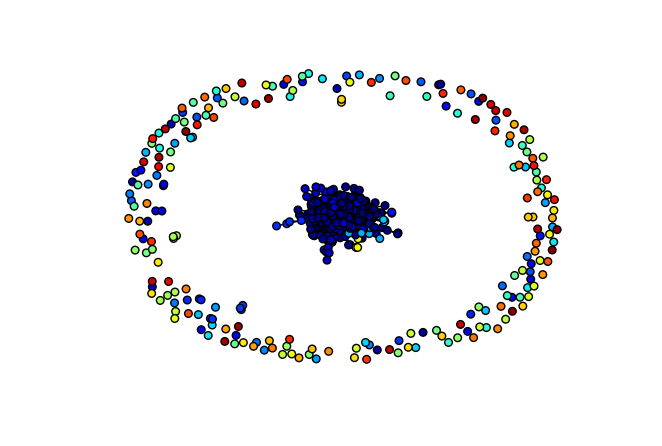

In [577]:
# to get an idea about the partition we plot it with colours representing each community:
values = [partition.get(node) for node in philosophersUndirected.nodes()]
nx.draw_spring(philosophersUndirected, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [578]:
# B is the number of branches:
B = 6
# C is the number of communities
C = len(list(set(values)))
# D is a matrix of size BxC
sizeD = B * C

# Let's invert our partition list to see better who are together in a community:
inv_partition = {}
for k, v in partition.iteritems():
    inv_partition[v] = inv_partition.get(v, [])
    inv_partition[v].append(k)

In [584]:
# Now we want our two row and column items to be of the same type, list of lists
# our branches were a list of sets so we make a list of lists
philo_lists = []
for i in range(len(philo_sets)):
    philo_list = sorted(list(set(philo_sets[i])))
    philo_lists.append(philo_list)

In [585]:
# Now we want our two row and column items to be of the same type, list of sets
# our partition list was a list of lists so we make a list of sets

inv_partitionSet = []

for i in range(len(inv_partition.values())):
    inv_partitionSet.append(set(inv_partition.values()[i]))

In [587]:
D = np.zeros(shape=(B,C))
# we see how much in common each branch has with each calculated community by iterating through
# the intersections of the sets
for i in range(B):
    for j in range(C):
        D[i][j] = len(set(inv_partitionSet[j].intersection(philo_sets[i])))

print "Our matrix is as follows"        
D

Our matrix is as follows


array([[ 45.,  35.,  18., ...,   0.,   0.,   0.],
       [ 10.,  50.,  18., ...,   0.,   0.,   0.],
       [ 12.,  13.,  15., ...,   0.,   0.,   0.],
       [ 82.,   3.,   0., ...,   0.,   1.,   0.],
       [  5.,  32.,  54., ...,   1.,   0.,   1.],
       [ 18.,   1.,  12., ...,   0.,   0.,   0.]])

In [588]:
# Let's see how well the detected communities correspond with the branches by looking at some numbers:
# First let's see how many communities have more than 10 common philosophers with a branch
indices10 = np.where(D > 10)
x_y_coords10 =  zip(indices10[0], indices10[1])
print "The number of branches that have more than 10 common philosophers with a branch is: %d" % len(x_y_coords10)
# 20
indices20 = np.where(D > 20)
x_y_coords20 =  zip(indices20[0], indices20[1])
print "The number of branches that have more than 20 common philosophers with a branch is: %d" % len(x_y_coords20)
# 30
indices30 = np.where(D > 30)
x_y_coords30 =  zip(indices30[0], indices30[1])
print "The number of branches that have more than 30 common philosophers with a branch is: %d" % len(x_y_coords30)
# 40
indices40 = np.where(D > 40)
x_y_coords40 =  zip(indices40[0], indices40[1])
print "The number of branches that have more than 40 common philosophers with a branch is: %d" % len(x_y_coords40)
# 50
indices50 = np.where(D > 50)
x_y_coords50 =  zip(indices50[0], indices50[1])
print "The number of branches that have more than 50 common philosophers with a branch is: %d" % len(x_y_coords50)
# 60
indices60 = np.where(D > 60)
x_y_coords60 =  zip(indices60[0], indices60[1])
print "The number of branches that have more than 60 common philosophers with a branch is: %d" % len(x_y_coords60)
# 70
indices70 = np.where(D > 70)
x_y_coords70 =  zip(indices70[0], indices70[1])
print "The number of branches that have more than 70 common philosophers with a branch is: %d" % len(x_y_coords70)
# 80
indices80 = np.where(D > 80)
x_y_coords80 =  zip(indices80[0], indices80[1])
print "The number of branches that have more than 80 common philosophers with a branch is: %d" % len(x_y_coords80)
print "These numbers are out of a total number of %d psychologists in our graph," % len(values)
print "although they may seem small we do have a total of B*C = %d entries in our matrix," % sizeD
print "which would mean that a random partition would give 0-1 philosophers in each entry."
print "The fact that we have an entry with more than 70 philosophers and 10 entries with more than 30"
print "philosophers tells us that our communities correspond pretty well with our given branches."


The number of branches that have more than 10 common philosophers with a branch is: 24
The number of branches that have more than 20 common philosophers with a branch is: 10
The number of branches that have more than 30 common philosophers with a branch is: 8
The number of branches that have more than 40 common philosophers with a branch is: 4
The number of branches that have more than 50 common philosophers with a branch is: 2
The number of branches that have more than 60 common philosophers with a branch is: 1
The number of branches that have more than 70 common philosophers with a branch is: 1
The number of branches that have more than 80 common philosophers with a branch is: 1
These numbers are out of a total number of 947 psychologists in our graph,
although they may seem small we do have a total of B*C = 1386 entries in our matrix,
which would mean that a random partition would give 0-1 philosophers in each entry.
The fact that we have an entry with more than 70 philosophers and 

# Part II: Human navigation paths
This exercise works on the wikispeedia dataset. For details on wikispeedia, see Lecture 8

# IIa: Path lengths
The first thing we want to take a look at is path lengths. NetworkX allows us to calculate the shortest path between any pair of articles. We begin by comparing the length of human and shortests paths.

* For each source/target pair in the list of human navigation paths, calculate the shortest path using NetworkX. Plot the distribution of path lengths.

In [284]:
linksList = []

# We start by writing the edges of the graph from the file links to a list (starting from line 12)
# where the links start:
with open('wikispeedia_paths-and-graph/links.tsv', 'r') as f:
    lines = f.readlines()
    for line in lines[12:]:
        elements = line.strip().split("\t")
        linksList.append(elements)

In [285]:
# We then make a graph of the edges in the list
linksGraph = nx.Graph()
for item in linksList:
    linksGraph.add_edge(item[0], item[1])

In [286]:
import nltk
from nltk import word_tokenize

# Now we take the file that contains the human paths, paths_finished.tsv, and write it to a list:
wordList = []

with open('wikispeedia_paths-and-graph/paths_finished.tsv','r') as f:    
    lines = f.readlines()
    # only read from the line where the list begins
    for line in lines[16:]:
        elements = line.strip().split("\t")
        wordList.append(elements)

In [287]:
# We remove the semicolons from our list:
edgeList = []
for i in range(len(wordList)):
    subSemicolon = re.sub(r';', ' ', wordList[i][3])
    edgeList.append(subSemicolon)
    
splitEdges = [item.split(' ') for item in edgeList]

In [496]:
# Now we remove all the wrong paths from our splitEdges to better be able to
# find the right paths. Removing dead-ends and back gives us a better vies
# of a real human path and is easier to work with.

splitBackList = splitEdges
for i in range(len(splitBackList)):
    idx = 0
    while '<' in splitBackList[i]:
        idx = splitBackList[i].index('<')
        del splitBackList[i][idx]
        del splitBackList[i][idx-1]

In [497]:
# This link is dead and every list that contains it ends there, so we remove it (a little bit of hard coding :))
for i in range(len(splitBackList)):
    if 'Wikipedia_Text_of_the_GNU_Free_Documentation_License' in splitBackList[i]:
        del splitBackList[i][-1]

In [498]:
# Now we get the first and last item of each human path, that is, the source and the target:
sourceTargetList = []

for i in range(len(splitBackList)):
    sourceTargetList.append((splitBackList[i][0], splitBackList[i][-1]))

In [499]:
# Finally we calculate the shortest path (from our graph) for each of the items on our source-target-list:

shortestPathsList = []
shortestPathsListLen = []

for i in range(len(sourceTargetList)):
    sp = nx.shortest_path(linksGraph, source=sourceTargetList[i][0], target=sourceTargetList[i][-1])
    shortestPathsList.append(sp)
    # Because each path has one fewer links than nodes, we subtract 1 for the length of the path
    shortestPathsListLen.append(len(sp)-1)

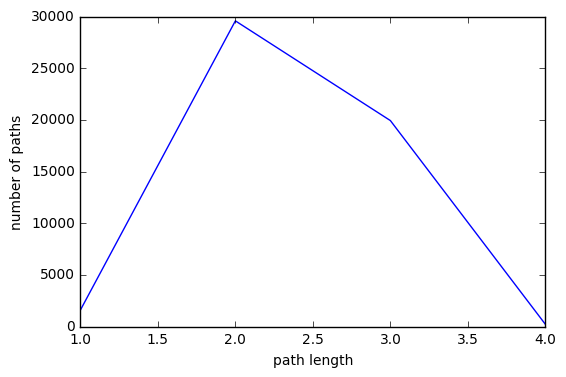

In [721]:
# Now we plot the length of each path against the number of times this length appears over all:
from collections import Counter

sortedShortestPathsLen = sorted(shortestPathsListLen)
countShortValues = [item[0] for item in Counter(sortedShortestPathsLen).items()]
countShortItems = [item[1] for item in Counter(sortedShortestPathsLen).items()]

# We're not interested in the paths that lead to nowhere
plt.plot(countShortValues[1:], countShortItems[1:])
plt.xlabel('path length')
plt.ylabel('number of paths')
plt.show()


* For each source/target pair, calculate the length of the human path. The dataset contains information on people who regret a navigation step and hit the "back" button in their web-browser. It's up to you how to incorporate that information in the path. Justify your choice. Plot the distribution of human path lengths.

In [1]:
# We have already deleted the back steps in the previous code,
# now we calculate the lengths of the paths
# we subtract one as the edges are one less than the nodes
humanListLen = []

for i in range(len(splitBackList)):
    humanListLen.append(len(splitBackList[i])-1)

NameError: name 'splitBackList' is not defined

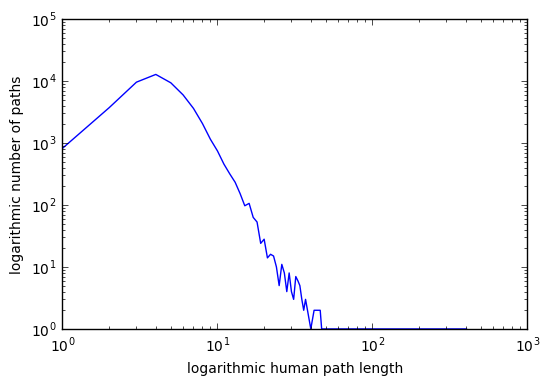

In [731]:
# We do the same as before, plot the logarithmic value of each human path length against the logarithmic
# number of times this length appears:

sortedHumanPathsLen = sorted(humanListLen)
countHumanValues = [item[0] for item in Counter(sortedHumanPathsLen).items()]
countHumanItems = [item[1] for item in Counter(sortedHumanPathsLen).items()]

# We're not interested in the paths that lead to nowhere
plt.loglog(countHumanValues[1:], countHumanItems[1:])
plt.xlabel('logarithmic human path length')
plt.ylabel('logarithmic number of paths')
plt.show()


* How much longer are the human paths on average?

In [549]:
avgShortestPaths = sum(shortestPathsListLen)/len(shortestPathsListLen)
avgHumanPaths = sum(humanListLen)/len(humanListLen)
difference = avgHumanPaths - avgShortestPaths

print "The average of shortest paths is %f" % avgShortestPaths
print "The average of human paths is %f" % avgHumanPaths
print "Human paths are therefore %f longer on average" % difference

The average of shortest paths is 2.387922
The average of human paths is 5.031886
Human paths are therefore 2.643964 longer on average


* Create scatter plot where each point is a source/target pair, and you have human path lengths on the x-axis and shortest paths on the y-axis.

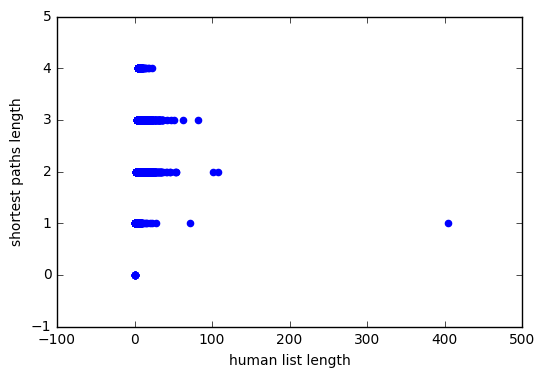

In [857]:
import plotly.plotly as py

plt.scatter(humanListLen, shortestPathsListLen, color='b')
plt.xlabel('human list length')
plt.ylabel('shortest paths length')
plt.show()

* Is there a correlation between human/shortest path-lengths? What is the correlation?

Not looking at the user that used more than 400 links to find a path between the United States and English Language (which can apparently be done in one link), the correlation is still not great. Not taking note of outliers, the human paths become a little bit longer with longer shortest paths, except for when the shortest path is 4, then the humans perform better.

# IIb. Betweenness
An interesting definition of centrality is betweenness centrality. In a traditional setting, this measure calculates all shortest paths in the network and then each node gets a score according to which fraction of all shortest paths pass through that node.

In this part, we will create our own version of centrality, based on the source/target pairs in our dataset. We define a nodes's **navigation centrality** as follows.

*Navigation centrality* of node *i* is the fraction of all naviagtion paths that pass through *i*. We exclude the source and target from the count. If a node has not been visited by a search, the navigation centrality of that node is defined to be zero.
In the exercises below, we investigate the relationship between navigation centrality and betweenness centrality.

* Begin by calculating the betweenness centrality and navigation centrality of all nodes in the wikispedia dataset. Note that calculating the betweenness centrality can take quite a long time, so you might start it running in a separate notebook while first estimating it based on the existing human path.

In [625]:
# betweenness centrality:
betwCentral = nx.betweenness_centrality(linksGraph)

* First, list the 5 pages with highest navigation centrality.

In [626]:
# We take items between the source and the target and append it to a list:
navigationPaths = []
for i in range(len(splitBackList)):
    navigationPaths.append(splitBackList[i][1:-1])

In [627]:
# We flatten out the list and count how many times each item appears in ratio to the length:

flatNavigation = [item for sublist in navigationPaths for item in sublist]

countNavigationValues = [item[0] for item in Counter(flatNavigation).items()]
countNavigationRatio = [item[1]/len(navigationPaths) for item in Counter(flatNavigation).items()]

zipNavigation = zip(countNavigationValues, countNavigationRatio)
top5Navigation = sorted(zipNavigation, key=operator.itemgetter(1), reverse=True)[:5]
top5Navigation

[('United_States', 0.16964447213457404),
 ('Europe', 0.08270193138653857),
 ('United_Kingdom', 0.07271338706111703),
 ('Earth', 0.06127781015736479),
 ('England', 0.05816267057901401)]

* Second, list the 5 pages with highest betweenness centrality.

In [628]:
top5between = sorted(betwCentral.items(), key=operator.itemgetter(1), reverse=True)[:5]
top5between

[('United_States', 0.12521613253794944),
 ('United_Kingdom', 0.04738683598690359),
 ('Europe', 0.044657653090970265),
 ('France', 0.03680940459534679),
 ('England', 0.033597031510552634)]

* Compare the two lists. Explain the differences between the two lists in your own words.
    * Both lists have only locations as the highest values, countries, continents, and planets. In both cases, the United States has by far the highest score. The only pages that don't appear in both lists are France and Earth. France contains more of the actual shortest paths while the human users click more on the link that contains the Earth-wikipedia page. 

* Create a scatterplot of betweenness centrality vs. navigation centrality.

In [847]:
# We only want to scatterplot the centralities for the nodes that exist in both lists
intersect = list(set(linksGraph.nodes()).intersection(flatNavigation))
intersectBetween = []
for i in range(len(betwCentral.items())):
    if betwCentral.items()[i][0] in intersect:
        intersectBetween.append(betwCentral.items()[i])

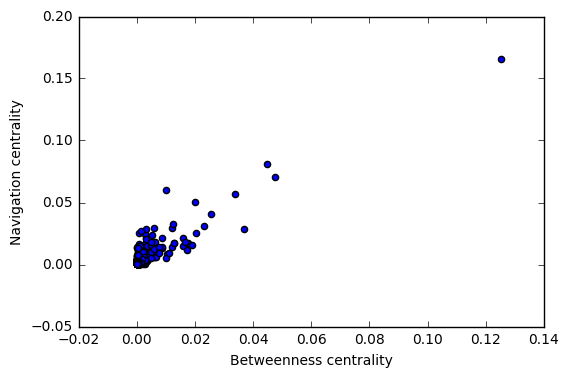

In [919]:
# We get the centrality values for the betweenness and navigation

intersectBetweenVals = [item[1] for item in sorted(intersectBetween)]
zipNavigationVals = [item[1] for item in sorted(zipNavigation)]

fig, ax = plt.subplots()
ax.scatter(intersectBetweenVals, zipNavigationVals)

#plt.scatter(intersectBetweenVals, zipNavigationVals, color='r')
plt.xlabel('Betweenness centrality')
plt.ylabel('Navigation centrality')

plt.show()

#plot_url = py.plot_mpl(fig, filename="mpl-scatter")

Let's explore the pages that have navigation centrality equal to zero.

* How many pages have zero navigation centrality?

In [817]:
diff = list(set(linksGraph.nodes()).difference(flatNavigation))
print "%s pages have zero navigation centrality" % len(diff)

1322 pages have zero navigation centrality


* What is the the page with zero navigation centrality and highest betweenness centrality? Can you explain why no human navigated to this page? Can you explain why the page is central in the actual link network? (For example, you can take a look at the degree of the node).

In [861]:
# We look at the nodes that have zero navigation but are still in the graph:
zeroNav = []
for i in range(len(diff)):
    if betwCentral.items()[i][0] in diff:
        zeroNav.append(betwCentral.items()[i])

In [877]:
# We sort these nodes and check which has the highest betweenness centrality
topNav = sorted(zeroNav, key=operator.itemgetter(1), reverse=True)
topNav[0]

('Fauna_of_Australia', 0.00044373376141581156)

In [871]:
# Let's look at the degree of this particular node:
degreeFauna = linksGraph.degree('Fauna_of_Australia')
degreeFauna

74

Fauna of Australia is the page with the highest betweenness centrality of the pages that have zero navigation centrality. I think this is not a page that many humans (me included) would suspect had a lot of links, so it doesn't seem worthwile to click the strange name, but in fact it has a degree of 74, so the number of links given on the page is very high.

* Plot the distribution of betweenness centrality for the pages with zero navigation centrality.

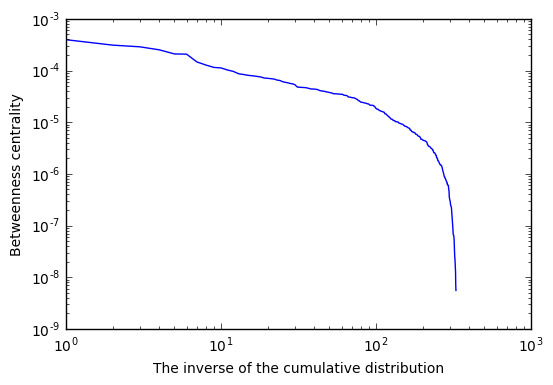

In [885]:
topNavValues = [x[1] for x in topNav]

# Now we plot the inverse of the cumulative distribution of the betweenness centrality,
# we have already sorted the values so the plot shows them in descending order
plt.loglog(topNavValues)
plt.xlabel('The inverse of the cumulative distribution')
plt.ylabel('Betweenness centrality')
plt.show()

Now, let's throw out all pages with zero navigation centrality and compare navigation- and betweenness centrality for the remaining pages.

* What is the correlation between betweenness centrality and navigation centrality?

In [888]:
# Let's calculate the correlation between the two lists:
correlation = np.corrcoef(intersectBetweenVals,zipNavigationVals)
correlationVal = correlation[0][1]

print "The correlation between betweenness centrality and the navigation centrality is %f." % correlationVal

The correlation between betweenness centrality and the navigation centrality is 0.892011.


In [900]:
# Let's zip the two lists together
zipNavigationItems = [item[0] for item in sorted(zipNavigation)]

zippedList = zip(zipNavigationItems, intersectBetweenVals, zipNavigationVals)

# To get the outliers we reverse sort by the navigation centrality
# and then sort in the right order by the betweenness centrality:

sortedZippedNav = sorted(sorted(zippedList, key=operator.itemgetter(2), reverse=True), key=operator.itemgetter(1))
sortedZippedNav[:5]

[('CPU_cache', 0.0, 7.7945360302428e-05),
 ('Myco-heterotrophy', 2.1092771497983725e-08, 5.8459020226820995e-05),
 ('Scattered_disc', 3.693994800079363e-08, 1.9486340075607e-05),
 ('List_of_universities_in_the_United_Kingdom',
  5.3854120167795095e-08,
  0.000565103862192603),
 ('Soil_structure', 6.572531338027253e-08, 7.7945360302428e-05)]

We first sort by a low betweenness centrality value and a high navigation value and get a list of the pages that humans clearly think are more helpful than they are. CPU-cache has for example no betweenness centrality but is clicked pretty often.

In [901]:
sortedZippedBet = sorted(sorted(zippedList, key=operator.itemgetter(1), reverse=True), key=operator.itemgetter(2))
sortedZippedBet[:5]

[('Tourette_syndrome', 0.0008987318251022505, 1.9486340075607e-05),
 ('Bryce_Canyon_National_Park', 0.00020388489176342793, 1.9486340075607e-05),
 ('Turquoise', 0.00020326576883630893, 1.9486340075607e-05),
 ('Djibouti', 0.00019024123385209593, 1.9486340075607e-05),
 ('Cochineal', 0.0001816122064427992, 1.9486340075607e-05)]

We also look at the links that humans don't consider useful but in fact are (more than not). Since we don't have the nodes with zero navigation centrality we get the links that are clicked once in the whole file.

# IIc: Bringing the text into the picture
Now that we have an idea about the differences between how humans and computers search in networks, we are going to dig a little deeper using the page content to test a hypothesis to explain why the human navigation paths are longer. The general idea is that humans (who don't know about the global network structure) tend to jump between pages that have related content. For this reason we expect that (on average) human navigation paths have more similar content than the shortest paths in the network (which might take 'surprising' shortcuts via relatively unrelated pages). In short.

*Hypothesis H1: Human navigation paths have more similar content than network shortest paths.*
The way we'll test this hypothesis is to first represent each page as a vector using a bag-of-words approach, then we can calculate a distance between pairs of pages using some vector-space difference, and finally we'll characterize each path by its average pair-wise distance. Below, I've set up that process as an exercise.

In [550]:
links = linksGraph.nodes()

In [925]:
# Now we get all of the pages in json-format and save them to files:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query&titles="
content = "prop=extracts&exlimit=max&explaintext&rvprop=content"
dataformat = "format=json"
for i in range(len(links)):
    title = links[i]
    file_path = path.relpath("GraphNodes/" + title + ".txt")
    linkFile = open(file_path, "w")
    query = "%s%s%s&%s&%s" % (baseurl, action, title, content, dataformat)
    linkResponse = urllib2.urlopen(query)
    wikisource = linkResponse.read()
    wikijson = json.loads(wikisource)
    linkFile.write(str(wikijson))
    linkFile.close()

In [590]:
# We write each file as a list of the tokens in the file

for i in range(len(links)):
    title = links[i]
    file_path = path.relpath("Tokens/" + title + ".txt")
    philFile = open(file_path, "w")
    with open("GraphNodes/" + title + ".txt") as material:
        lines = material.readlines()
        for line in lines:
            tokenWords = nltk.word_tokenize(line)
        with open(file_path, 'w') as the_file:
            the_file.write(title)
            for item in tokenWords:
                the_file.write("%s\n" % item)

In [591]:
# Then we put the words in each file to a list, stemming each word
# so we get a better clue of what the list means. There is no need
# to remove the stop words since tf-idf takes care of that:

from nltk.stem import PorterStemmer
import os

linkFiles = []
linkFileNames = []
porter = PorterStemmer()

for idx, filename in enumerate(os.listdir("Tokens")):
    if filename.endswith(".txt"):
        data = [line.strip() for line in open("Tokens/" + filename, 'r')]
        dataNoN = [line.replace("\\n"," ") for line in data]
        dataAlpha = [item.lower() for item in dataNoN if item.isalpha()]
        contentStemmed = [porter.stem(x) for x in dataAlpha]
        linkFiles.append(contentStemmed)
        linkFileNames.append(filename)

In [592]:
# To be able to work with the file names later, we remove the file ending from their names
fileNames = [line.replace(".txt", "") for line in linkFileNames]

In [593]:
# We count the occurrences of each word in each file:
cntList = []
for i in range(len(linkFiles)):
    cnt = Counter(linkFiles[i]).items()
    topCnt = sorted(cnt)
    cntList.append(topCnt)

In [594]:
# Now we make a list of all unique words that appear in all of the documents:
uniqueLists = []
for i in range(len(linkFiles)):
    uniqueLists.append(sorted(list(set(linkFiles[i]))))

In [597]:
# flatten the words of the uniqueLists and count the values:
import math

uniqueFlat = [item for sublist in uniqueLists for item in sublist]
cntWordOccurrences = Counter(uniqueFlat).items()
wordsInList = [x[0] for x in cntWordOccurrences]
idfForWord = [math.log(len(linkFiles)/x[1]) for x in cntWordOccurrences]

In [600]:
# This list has the idf for each word in the list of unique words:
idfList = sorted(zip(wordsInList, idfForWord))

In [601]:
# Now we take each word of the tf list of each page and compare it to 
# the words of the list of inverse document frequencies. If it's the
# same word, we multiply the values of tf and idf to create a tf-idf list
# for each page:

tfIdfList = []
for i in range(len(cntList)):
    results = []
    try:
        iter1 = iter(cntList[i])
        iter2 = iter(idfList)
        i = iter1.next()
        j = iter2.next()
        while True:
            if i[0] == j[0]:
                results.append((i[0], i[1]*j[1]))
                i = iter1.next()
                j = iter2.next()
            elif i[0] < j[0]:
                i = iter1.next()
            else:
                j = iter2.next()
    except StopIteration:
        pass
    tfIdfList.append(results)

In [602]:
# Next we define a function that calculates the cosine similarity between two lists of tf-idf:
def cosSim(link1, link2):
    cosineList = []
    try:
        iter1 = iter(link1)
        iter2 = iter(link2)
        tfitems1 = [x[1] for x in link1]
        tfitems2 = [x[1] for x in link2]
        i = iter1.next()
        j = iter2.next()
        while True:
            if i[0] == j[0]:
                cosineList.append(i[1]*j[1])
                i = iter1.next()
                j = iter2.next()
            elif i[0] < j[0]:
                i = iter1.next()
            else:
                j = iter2.next()
    except StopIteration:
        pass
    return sum(cosineList)/(np.linalg.norm(tfitems1)*np.linalg.norm(tfitems2))

In [603]:
# We remove the paths that only have one item, and therefore no path.
# We start by removing the paths that only have one or two items, and therefore no real path.
# Since we can't compare the lists when their indices are messed up, we remove all the same indices
# from human paths and shortest paths, where the shortest path was of length zero or one. 
spList = shortestPathsList
for i,val in enumerate(spList):
    if len(spList[i]) == 1:
        del spList[i]
        del humanPathList[i]
    elif len(spList[i]) == 2:
        del spList[i]
        del humanPathList[i]
    else:
        pass

In [604]:
# To be able to calculate the cosine similarities, we need to know
# the indices of the file names we are interested in calculating:
idxsList = []
for i,val in enumerate(humanPathList):
    idxList = []
    for j,val in enumerate(humanPathList[i]):
        idxList.append(fileNames.index(humanPathList[i][j]))
    idxsList.append(idxList)

In [605]:
# Now we calculate the average cosine similarity for each human path:
avgCos = []

for j in range(len(idxsList)):
    cos = []
    for i in range(len(idxsList[j])-1):
        cos.append(cosSim(tfIdfList[idxsList[j][i]], tfIdfList[idxsList[j][i+1]]))
    avgCos.append(sum(cos)/len(cos))

In [607]:
# Now we have a list of the average cosine simlarities for the human paths.
# Since some of the links were in some way broken, we calculate the sum
# by converting nan-values to 0, with numpy:
meanHumanSim = np.nansum(avgCos)/len(avgCos)
print "The average of the human paths average similarities is %f" % meanHumanSim

The average of the human paths average similarities is 0.168510


In [609]:
# Now we calculate the variance of the list:
varHumanSim = np.nanvar(avgCos)
print "The variance of the human paths average similarities is %f" % varHumanSim

The variance of the human paths average similarities is 0.005663


* Calculate the average similarity for all shortest paths between the source/target pairs. Calculate mean/variance of these average similarities.

In [610]:
# We then find the indices of files of our paths in order to find the right lists:
idxsSPList = []
for i,val in enumerate(spList):
    idxList = []
    for j,val in enumerate(spList[i]):
        idxList.append(fileNames.index(spList[i][j]))
    idxsSPList.append(idxList)

In [611]:
avgSPCos = []

for j in range(len(idxsSPList)):
    cos = []
    for i in range(len(idxsSPList[j])-1):
        cos.append(cosSim(tfIdfList[idxsSPList[j][i]], tfIdfList[idxsSPList[j][i+1]]))
    avgSPCos.append(sum(cos)/len(cos))

In [612]:
# Now we have a list of the average cosine simlarities for the human paths.
# Since some of the links were in some way broken, we calculate the sum
# by converting nan-values to 0, with numpy:
meanSPSim = np.nansum(avgSPCos)/len(avgSPCos)
print "The mean of the shortest paths average similarities is %f" % meanSPSim

The mean of the shortest paths average similarities is 0.068442


In [614]:
# Now we calculate the variance of the list:
varSPSim = np.nanvar(avgSPCos)
varSPSim
print "The variance of the shortest paths average similarities is %f" % varSPSim

The variance of the shortest paths average similarities is 0.002678


* Plot the distributions of average similarities for both human- and shortest paths in a single plot.

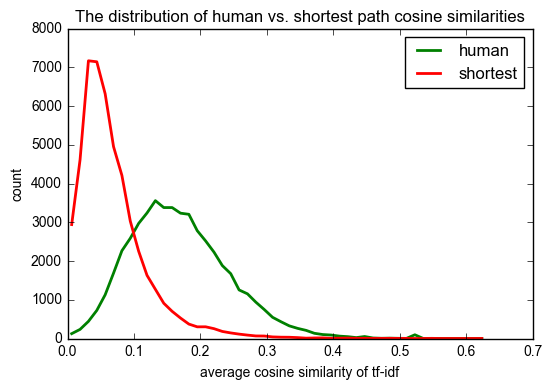

In [668]:
# To be able to see nuances in the graphs, we add to the number of bins:

x=np.array(avgCos)
data = np.nan_to_num(x)
y,binEdges=np.histogram(data,bins=50)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-', linewidth=2, color="g", label="human")

spX=np.array(avgSPCos)
dataSP = np.nan_to_num(spX)
y,binEdges=np.histogram(dataSP,bins=50)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters,y,'-', linewidth=2, color="r", label="shortest")

plt.xlabel('average cosine similarity of tf-idf')
plt.ylabel('count')
plt.title("The distribution of human vs. shortest path cosine similarities")
plt.legend(loc='best')
plt.rcParams["font.family"] = "Arial"
plt.show()

* Finally, for each source/target pair, compare the human-navigation average similarity with the betweenness based average similarity, testing what fraction of the time, the average similarity is lower in the case of human navigation.

In [622]:
humanLower = 0
humanHigher = 0
for i in range(len(avgCos)):
    if avgCos[i] > avgSPCos[i]:
        humanHigher += 1
    else:
        humanLower += 1

pctHigher = humanHigher/len(avgCos)
print "The human-navigation average similarity is higher in %d out of %d times, that is %f of the time." % (humanHigher, len(avgCos), pctHigher)

The human-navigation average similarity is higher in 44542 out of 49757 times, that is 0.895191 of the time.


*Comment on your findings. Is H1 true?*

According to H1, Human navigation paths have more similar content than network shortest paths. Based on our calculations of cosine similarities, the average similarity of our paths is higher in human paths than shortest paths around 89.5% of the time. That is a very high ratio, so based on these findings, H1 is definitely true.

# Part III
Exercise, sentiment over some books from NLPP1e

* Download the LabMT wordlist. It's available as supplementary material from Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter (Data Set S1). Describe briefly how the list was generated.

Answer: Language assessment by Mechanical Turk 1.0. In the supplementary tab-delimited file named Data Set S1, we provide our set of 10,222 words, their average happiness evaluations according to users on Mechanical Turk, and other information as described below. Please cite the present paper when using this word set. Within papers, we suggest using the abbreviation labMT 1.0 when referencing this data set. The words are ordered according to average happiness (descending), and the file contains eight columns: (1) word, (2) rank, (3) average happiness (50 user evalutions), (4) standard deviation of happiness, (5) Twitter rank, (6) Google Books rank, (7) New York Times rank, (8) Music Lyrics rank. The last four columns correspond to the ranking of a word by frequency of occurrence in the top 5000 words for the specified corpus.

* Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc). The function should complain if there are no words with sentiment attached.

In [1]:
# First we import the extra packages necessary for this exercise:
import nltk
import random 
%matplotlib inline
from nltk.book import *

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
type(text1)

nltk.text.Text

In [681]:
wordList = []
sentimentList = []

# get the words and the happiness_rank from our Lab MT word list, for the sentiment analysis
# those are column 0 and column 2
with open('Data_Set_S1.txt','r') as f:    
    lines = f.readlines()
    for i in range(4,len(lines)):
        elements = lines[i].strip().split("\t")
        wordList.append(elements)
    
for i in range(len(wordList)):
    sentimentList.append((wordList[i][0], wordList[i][2]))

# lists of words and happiness ranks
wordListWords = [item[0] for item in wordList[1:]]
wordListHR = [item[2] for item in wordList[1:]]
#fifteen=0
#wordList

In [703]:
# We create a function for calculating sentiments of a given list:

def sentimentAnalysisList(sentText):
    sentimentValue = []
    sentTextAlpha = [word.lower() for word in sentText if word.isalpha()]        
    for i,val in enumerate(sentTextAlpha):
        for j,val in enumerate(wordListWords):
            if sentTextAlpha[i] == wordListWords[j]:
                sentimentValue.append(float(wordListHR[j]))
            else:
                pass
            
    if sentimentValue == []:
        print "There are no words with sentiment attached in our list." 
    
    # To calculate sentiment of a given list of tokens we return the average of the sentiment values of the list
    # However, we don't need that for further work with our novel texts
    # return sum(sentimentValue)/len(sentimentValue)
    return sentimentValue

* Calculate a sentiment profile for the novels in NLPP1e chapter 1. The sentiment profile has sentiment on the y-axis and position in the text on the x-axis. Use a moving average to show how the sentiment changes. Create profiles for sliding windows of length 15 words, 50 words, 100 words, 500 words.

In [704]:
# We make lists with the sentiments of our novels (we have chosen to look at the Bible as a novel):
sentText1 = sentimentAnalysisList(text1)

In [706]:
sentText2 = sentimentAnalysisList(text2)

In [710]:
sentText3 = sentimentAnalysisList(text3)

In [735]:
sentText9 = sentimentAnalysisList(text9)

In [718]:
# We define a function that creates different sliding windows:
def sliding_window(iterable, size):
    i = iter(iterable)
    win = []
    for e in range(0, size):
        win.append(next(i))
    yield sum(win)/size
    for e in i:
        win = win[1:] + [e]
        pin=sum(win)/size
        yield pin

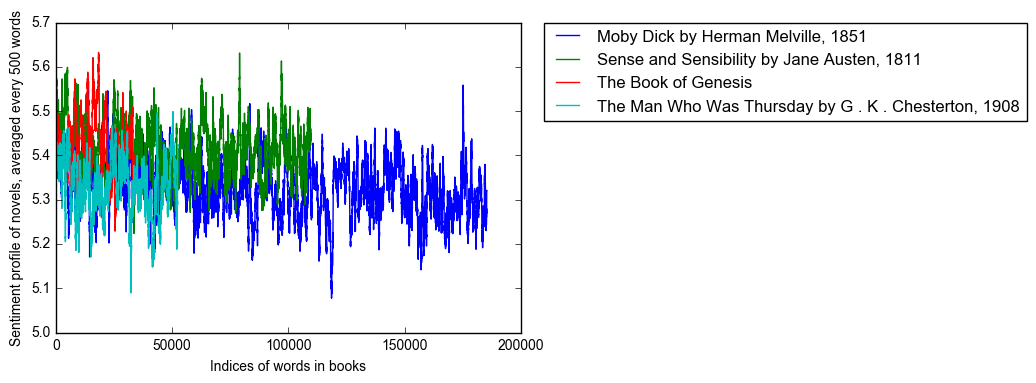

In [736]:
from __future__ import division
import numpy as np
%matplotlib inline


#we call the function sliding_window for the three novels in NLPP1e chapter 1
# to plot the average every 500 words
N1 = 500
d1=sliding_window(sentText1, N1)
vals_list1=np.array(list(d1))
plt.plot(vals_list1, label="Moby Dick by Herman Melville, 1851")
d2=sliding_window(sentText2, N1)
vals_list2=np.array(list(d2))
plt.plot(vals_list2, label="Sense and Sensibility by Jane Austen, 1811")
d3=sliding_window(sentText3, N1)
vals_list3=np.array(list(d3))
plt.plot(vals_list3, label="The Book of Genesis")
d9=sliding_window(sentText9, N1)
vals_list9=np.array(list(d9))
plt.plot(vals_list9, label="The Man Who Was Thursday by G . K . Chesterton, 1908")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Indices of words in books')
plt.ylabel('Sentiment profile of novels, averaged every 500 words')
plt.show()

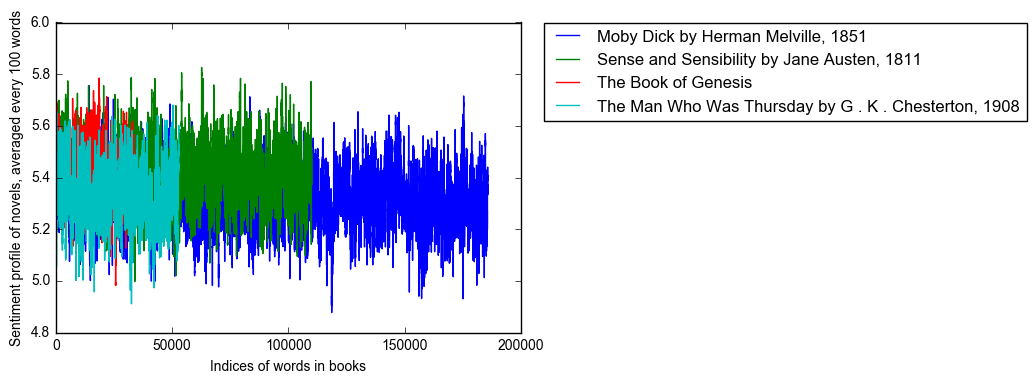

In [739]:
#we call the function sliding_window for the three novels in NLPP1e chapter 1
N2 = 100
d1=sliding_window(sentText1, N2)
vals_list1=np.array(list(d1))
plt.plot(vals_list1, label="Moby Dick by Herman Melville, 1851")
d2=sliding_window(sentText2, N2)
vals_list2=np.array(list(d2))
plt.plot(vals_list2, label="Sense and Sensibility by Jane Austen, 1811")
d3=sliding_window(sentText3, N2)
vals_list3=np.array(list(d3))
plt.plot(vals_list3, label="The Book of Genesis")
d9=sliding_window(sentText9, N2)
vals_list9=np.array(list(d9))
plt.plot(vals_list9, label="The Man Who Was Thursday by G . K . Chesterton, 1908")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Indices of words in books')
plt.ylabel('Sentiment profile of novels, averaged every 100 words')

plt.show()

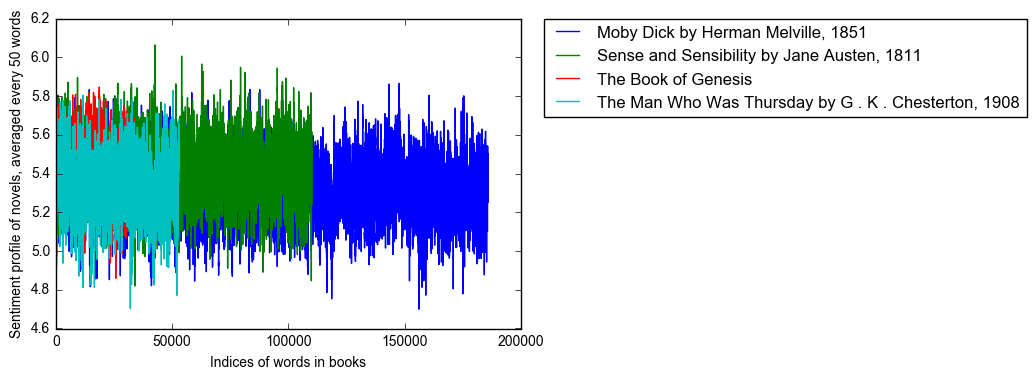

In [740]:
#Next, we use the function to calculate the moving average for 50 words
N3 = 50
d1=sliding_window(sentText1, N3)
vals_list1=np.array(list(d1))
plt.plot(vals_list1, label="Moby Dick by Herman Melville, 1851")
d2=sliding_window(sentText2, N3)
vals_list2=np.array(list(d2))
plt.plot(vals_list2, label="Sense and Sensibility by Jane Austen, 1811")
d3=sliding_window(sentText3, N3)
vals_list3=np.array(list(d3))
plt.plot(vals_list3, label="The Book of Genesis")
d9=sliding_window(sentText9, N3)
vals_list9=np.array(list(d9))
plt.plot(vals_list9, label="The Man Who Was Thursday by G . K . Chesterton, 1908")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Indices of words in books')
plt.ylabel('Sentiment profile of novels, averaged every 50 words')

plt.show()

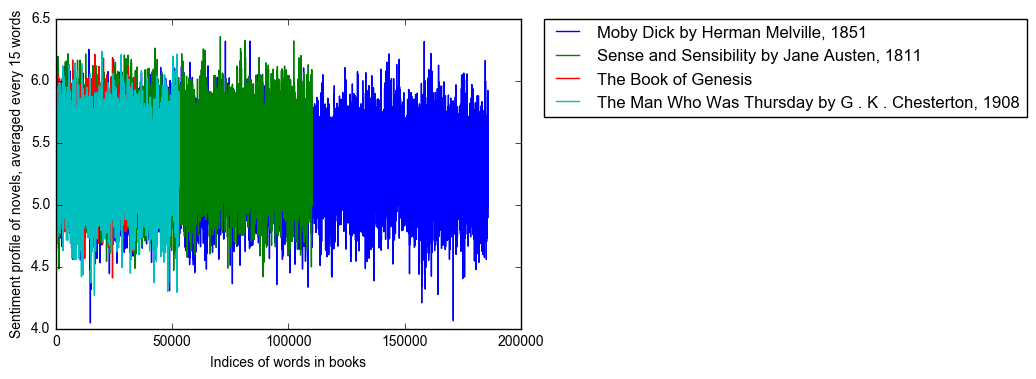

In [741]:
#Finally, we calculate the moving average for 15 words:
N4 = 15
d1=sliding_window(sentText1, N4)
vals_list=np.array(list(d1))
plt.plot(vals_list, label="Moby Dick by Herman Melville, 1851")
d2=sliding_window(sentText2, N4)
vals_list=np.array(list(d2))
plt.plot(vals_list, label="Sense and Sensibility by Jane Austen, 1811")
d3=sliding_window(sentText3, N4)
vals_list=np.array(list(d3))
plt.plot(vals_list, label="The Book of Genesis")
d9=sliding_window(sentText9, N4)
vals_list9=np.array(list(d9))
plt.plot(vals_list9, label="The Man Who Was Thursday by G . K . Chesterton, 1908")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('Indices of words in books')
plt.ylabel('Sentiment profile of novels, averaged every 15 words')
plt.show()

* Comment on the sentiment profiles. Do they show a similar pattern? What is the effect of changing the size of the sliding window?

By increasing the size of the words we receive less cluttered plots, resulting in the sliding windows for n=15, n=50 and n=100 becoming harder to analyse. If we look closer at the plot with a moving average of n=500 words we definitely see some fluctuation in the stories (sad chapters and happy chapters). Also we can notice that text 1 (Moby Dick by Herman Melville, 1851) scores on average the lowest of the four books, with something TERRIBLE happening ca. 10,000 and 170,000 words in, and can therefore be considered the "saddest". The Book of Genesis rises fast in it's optimism but then becomes sadder twoards the end. The Man Who Was Thursday is a short book, and it appears to be dark, at least it takes dips in the happiness-rank-scores along the way and has nearly always a lower score (more sad) than Sense and Sensibility, which is the "happiest" book of all four. Of course, it's a love story.